### Welcome to the Airbnb Mini Practice Project

As you've worked through Python Sub Unit you would have realised there are a number of powerful functions you can use.

You would have covered the following libraries:

<li> Matplotlib </li>
<li> Seaborn </li>
<li> Pandas </li> 
    
These are all powerful libraries to help augment your data analysis capabilities.
In these set of exercises below, we've crafted a few extra challenges to reinforce your understanding of how these libraries work. 

Please note there is a particular emphasis on the Pandas Library as this is the most critical library you will be using throughout your career as a data analyst. You'll see the similarities that hold with respect to Pandas and Pivot Tables!
    
<b> The most important thing to build confidence with Python is to practice all the time. This way you will build muscle memory. Don't simply copy the code you've written previously but write it again and again so you build the muscle memory associated with these coding libraries. </b> 

<H3>  Let's get started! </H3>

We've provided a file called airbnb_2.csv that you'll need to import.

Let's do this first before we start our analysis.

<b> Don't forget to import the libraries you need to read .csv files! </b> 



### Step 1: <span style="color:green">Import Libraries</span> 
<b> Put your code in the box below </b>


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

Now that you have the Pandas Libraries imported, it's time to import the airbnb dataset.

<b> i) Please import the airbnb dataset.

ii) Upon completion of this, use .info() to better understand the variables inside your dataset.
<p>    

<b> Put your code in the box below </b>

In [3]:
df = pd.read_csv('airbnb_2.csv')
print(df.head())
print('Shape: ',df.shape,'\n',df.columns)

     id                                              name  host_id   
0  2539                Clean & quiet apt home by the park     2787  \
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude   
0         John            Brooklyn    Kensington  40.64749  -73.97237  \
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review   
0     Private room    149               1                  9  19

### Step 3: <span style="color:green">Exploring your data with Pandas</span> 

The rest of these questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



<b> i)  Please count how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>
<p>
    <b> Put your code in the box below </b>

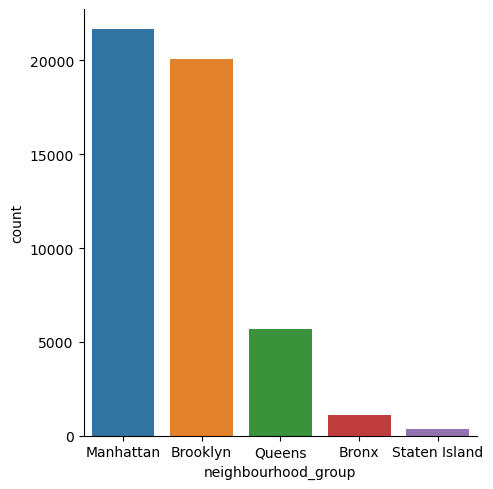

In [11]:
sns.catplot(data=df,kind='count',x='neighbourhood_group',order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])
plt.show()

We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings.

<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>

<b> Put your code in the box below </b>

In [22]:
test = df.groupby('neighbourhood_group')['id'].count()/df['id'].count()
print(test)

neighbourhood_group
Bronx            0.022313
Brooklyn         0.411167
Manhattan        0.443011
Queens           0.115881
Staten Island    0.007629
Name: id, dtype: float64


<b> iii) Create a new calculated field called Revenue and place this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

<b> Put your code in the box below </b>

In [24]:
df['revenue'] = df.price*df.number_of_reviews

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

If you're stuck, we recommend you go back to <a href = https://learn.datacamp.com/courses/manipulating-dataframes-with-pandas> this </a> datacamp link. Specifically Chapter 4 which covers how GROUP BY is used in Pandas.

<b> Put your code in the box below </b>

In [1]:
neighbourhood_revenue = df.groupby('neighbourhood_group')['revenue'].mean().reset_index()

sns.catplot(data=neighbourhood_revenue,x='neighbourhood_group',y='revenue',kind='bar',\
            order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])
plt.show()

NameError: name 'df' is not defined

<h3> <span style="color:green">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb Dataframe to include only the Neighbourhood Groups Manhattan, Brookly and Queens. 
    
Upon completion of this, identify the top 3 Revenue Generating Neighborhoods within each of the three Neighbourhood_Groups. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

This is a tricky question that will *test* your group-by skills.

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the Dataframe using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
<b> Put your code in the box below </b>

In [62]:
#total revenue by neighbourhood_group
neighbourhood_group_rev = df.groupby('neighbourhood_group')['revenue'].sum().reset_index()

#total revenue by neighbourhood_group and neighbourhood
neighbourhood_by_group = df.groupby(['neighbourhood_group','neighbourhood'])['revenue'].sum().reset_index()


top_neighbourhood_group = (
    """take the 3 highest revenues from neighbourhood_group"""
    neighbourhood_group_rev
    .nlargest(3,'revenue')
    ['neighbourhood_group']
    """convert to a list to filter from later"""
    .tolist()
)

top_neighbourhood = (
    """filter out the bottom 2 from neighbourhood_group"""
    neighbourhood_by_group[neighbourhood_by_group['neighbourhood_group'].isin(top_neighbourhood_group)]
    .groupby('neighbourhood_group')
    """map the .nlargest method to the 'revenue' column since you can't use it on a series"""
    .apply(lambda x: x.nlargest(3,'revenue'))
    .reset_index(drop=True)
)
print(top_neighbourhood)

  neighbourhood_group       neighbourhood   revenue
0            Brooklyn        Williamsburg  12389011
1            Brooklyn  Bedford-Stuyvesant  12352457
2            Brooklyn            Bushwick   4762224
3           Manhattan              Harlem   8598692
4           Manhattan      Hell's Kitchen   8238991
5           Manhattan        East Village   7574535
6              Queens             Astoria   1880840
7              Queens    Long Island City   1374945
8              Queens            Flushing   1140450


<b> VI) Building on the previous question where you identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, please filter the Airbnb Dataframe to include only these neighbourhoods. 
    
Upon completion of this, identify the  top average revenue generating room type for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>

This is a tricky question that will *test* your group-by skills. Think back to the previous question and how you approached this; you can approach this in a similar manner. 

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the Dataframe using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
 <b> Put your code in the box below </b>      

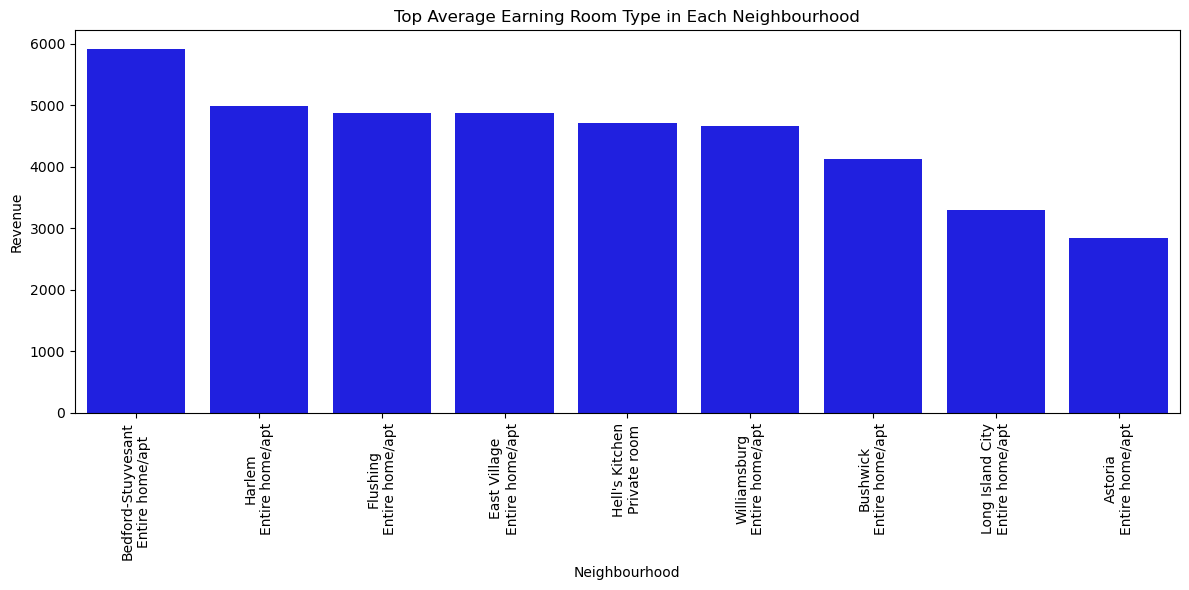

In [17]:
# create a revenue column for ease of use
df['revenue'] = df.price*df.number_of_reviews

# create a quick list of the top 3 neighbourhoods in the top 3 neighbourhood groups
# can also be accomplished with: list_neighbourhoods= top_neighbourhood['neighbourhood'].tolist()
list_neighbourhoods = ['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Harlem', "Hell's Kitchen", 'East Village', 'Astoria', 'Long Island City', 'Flushing']

# creates subset of neighbourhoods we want
in_neighbourhoods = df[df['neighbourhood'].isin(list_neighbourhoods)]


top_room_type = (
    in_neighbourhoods
    .groupby(['neighbourhood','room_type'])['revenue'] # by each neighbourhood, aggregate the revenue column
    .mean()# find average revenue 
    .reset_index() # reset the index to cast as a dataframe instead of a series
    .sort_values(['neighbourhood','revenue'],ascending=[True,False]) # sort alphabetically then by most revenue
    .groupby('neighbourhood') # again group by neighbourhood
    .head(1) # select the 1st room type for each neighbourhood
    .reset_index(drop=True) # reset index to cast back to a dataframe
)

# sort by revenue
top_room_type = top_room_type.sort_values('revenue',ascending=False)


# this is just to make the graph larger
plt.figure(figsize=(12, 6))

# create the plot
ax = sns.barplot(data=top_room_type, x='neighbourhood', y='revenue',color='b')

# labels
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue')
plt.title('Top Average Earning Room Type in Each Neighbourhood')

# rotate the x axis labels for legibility
plt.xticks(rotation=90)

# add and set labels using an f string and zip() to iterate through both columns in parallel
x_labels = [f"{neighbourhood}\n{room_type}" for neighbourhood, room_type in zip(top_room_type['neighbourhood'], top_room_type['room_type'])]
ax.set_xticklabels(x_labels)

# tight layout used so there are margins
plt.tight_layout()
plt.show()